# DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np

In [2]:
pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')

In [7]:
combats.head(3) #doesn't make sense to use describe here

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668


In [8]:
pokemon.head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False


In [4]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Regular Defense')

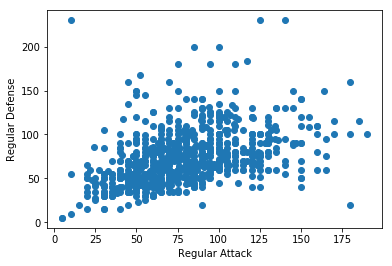

In [13]:
plt.scatter(pokemon.Attack, pokemon.Defense)
plt.xlabel('Regular Attack')
plt.ylabel('Regular Defense')

In [3]:
pokemon['ratio'] = pokemon.Attack/pokemon.Defense
pokemon.loc[pokemon.ratio.argsort()[-1:-4:-1]]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,ratio
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.00
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.50
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.75


In [23]:
pokemon.loc[pokemon.ratio.argsort()[0:4]]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,ratio
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,0.281250


In [48]:
value_counts = combats.Winner.value_counts()
len(value_counts) # 

783

In [60]:
pd.Series([1,3,3,3,3,42,4,4,4,4,2]).value_counts().sort_values().index[-1:-3:-1]

Int64Index([3, 4], dtype='int64')

In [61]:
#The ten pokemon with the highest number of victories are:
pokemon.loc[value_counts.sort_values().index[-1:-11:-1]]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,ratio
163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,1.222222
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385
438,Infernape,Fire,Fighting,76,104,71,104,71,108,False,1.464789
428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True,1.000000
432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True,1.055556
314,Slaking,Normal,NaN,150,160,100,95,65,100,False,1.600000
214,Murkrow,Dark,Flying,60,85,42,85,42,91,False,2.023810
394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False,2.500000
249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False,1.000000
427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True,1.800000


In [74]:
sum(pokemon['Class 2'] == 'Grass')

25

In [67]:
sum(pokemon['Class 1'] == 'Grass')

70

In [75]:
pokemon_grass = pokemon.loc[lambda df: (df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]
pokemon_rock = pokemon.loc[lambda df: (df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]

In [73]:
len(pokemon_grass)

95

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76e49e1550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76e49e1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76e49e1208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76e49ec2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76e49ec5f8>],
 'means': []}

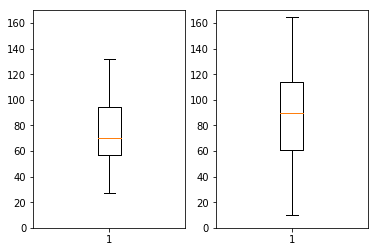

In [94]:
plt.subplot(121)

ax1=plt.subplot(1,2, 1)

ax2=plt.subplot(1,2,2)
ax2.set(ylim = [0, 170])
ax1.set(ylim = [0, 170])

ax1.boxplot(pokemon_grass.Attack)

ax2.boxplot(pokemon_rock.Attack)


In [95]:
pokemon_rock.Attack.describe()

count     58.000000
mean      90.724138
std       34.857501
min       10.000000
25%       61.000000
50%       90.000000
75%      114.250000
max      165.000000
Name: Attack, dtype: float64

In [97]:
pokemon_grass.Attack.describe()

count     95.000000
mean      73.463158
std       24.168210
min       27.000000
25%       57.000000
50%       70.000000
75%       94.500000
max      132.000000
Name: Attack, dtype: float64

In [6]:
pokemon['ratios'] = pokemon['Sp. Atk']/pokemon['Sp. Def']

In [101]:
len(pokemon.columns)

12

In [108]:
pok[1]['Attack']

49

In [8]:
#How many classes do we have?
classes = pd.concat([pokemon['Class 1'],pokemon['Class 2']]).unique()

In [110]:
classes

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', nan], dtype=object)

In [5]:
pokemon.columns

Index(['pid', 'Name', 'Class 1', 'Class 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'ratio'],
      dtype='object')

In [110]:
features = cols
features.append('Legendary')
for c in classes:
    features.append(c)

In [142]:
cols

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'ratio', 'ratios']

In [78]:
vecs = []
cols = list(pokemon.columns[4:10])
cols.append(pokemon.columns[11])
cols.append(pokemon.columns[12])
pokemon['vec'] = None
for pok in pokemon.iterrows(): #TODO: more efficient way to do this with dataframe aggregation
    vec = [pok[1][col] for col in cols] 
    
    #Add categorical features
    if pok[1]['Legendary']:
        vec.append(1) 
        vec.append(0)
        
    else:
        vec.append(0) 
        vec.append(1) 
    
    #one hot encoding
    for c in classes:
        if(pok[1]['Class 1'] == c  or pok[1]['Class 2'] == c):
            vec.append(1)
            
        else:
            vec.append(0)
            
    pokemon.vec[pok[0]] = vec


/ivrldata1/home/jose/.conda/envs/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Build the training set

In [79]:
merged = combats.merge(pokemon, left_on = ['First_pokemon'], right_on = 'pid').merge(pokemon, left_on = ['Second_pokemon'], right_on = 'pid')

In [16]:
merged.head(1)

,First_pokemon,Second_pokemon,Winner,pid_x,Name_x,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,...,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,ratio_y,ratios_y,vec_y
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,...,70,70,40,60,40,60,False,1.75,1.5,"[70, 70, 40, 60, 40, 60, 1.75, 1.5, 0, 1, 0, 0..."


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [76]:
from sklearn import svm

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
#TODO more feature expansion here
merged['vec_total'] = merged.vec_x + merged.vec_y

In [81]:
merged['label'] = merged.pid_x == merged.Winner

In [82]:
X = merged.vec_total
y = merged.label

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = list(X_train)
X_test = list(X_test)

In [86]:
#Train naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [223]:
predictions = gnb.predict(X_test)
X_train = list(X_train)
X_test = list(X_test)

In [224]:
accuracy_score(y_test, predictions)

0.7367333333333334

In [89]:
#Let's train a random forrest classifier. Wooooooooooow a random forrest gets a much better accuracy!
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

accuracy_score(y_test, rf.predict(X_test))

/ivrldata1/home/jose/.conda/envs/venv3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9234

In [ ]:
#support vector machines
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 


In [94]:
#Let's see the importance of some features
accuracy_score(y_test,clf.predict(X_test))

0.9096666666666666

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [93]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [96]:
accuracy_score(gbc.predict(X_test), y_test)

0.927

In [135]:
importances = gbc.feature_importances_

In [114]:
d

{'HP': 0.003231779596142668,
 'Attack': 0.01613757469979539,
 'Defense': 0.00039213673690252973,
 'Sp. Atk': 0.0004862175258856173,
 'Sp. Def': 0.00010457868221099295,
 'Speed': 0.4695941179414308,
 'ratio': 0.0,
 'ratios': 0.0,
 'Legendary': 0.0,
 'Grass': 0.0,
 'Fire': 3.527963207006243e-05,
 'Water': 0.0,
 'Bug': 0.0,
 'Normal': 0.0,
 'Poison': 0.005144454095927264,
 'Electric': 0.0013368673572351295,
 'Ground': 0.0,
 'Fairy': 0.0,
 'Fighting': 0.0,
 'Psychic': 0.0004203876011966446,
 'Rock': 0.0004568196672243945,
 'Ghost': 0.0,
 'Ice': 0.0018628765959865451,
 'Dragon': 0.0008616806545044856,
 'Dark': 0.0,
 'Steel': 0.00015318750923856177,
 'Flying': 2.499949333148248e-05,
 nan: 0.0005567812430760328}

In [115]:
#TODO: Normalize numerical features and try a deep neural network (which should be better).
#TODO: See if doing PCA or reducing the features in other ways helps

In [116]:
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import numpy as np
from tensorflow.python.keras.backend import set_session
import tensorflow as tf
import tensorflow.keras.backend as K

#####################################
# configure tf session
#####################################
config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 1 # limit the fraction of GPU mem used
config.gpu_options.allow_growth = True # allow dynamic allocation of GPU memory (instead of grabbing everything at the start)
config.log_device_placement=False
set_session(tf.Session(config=config))
            

In [122]:
from tensorflow.python.keras import models
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

In [159]:
X_train = np.array(X_train)

In [182]:
numerical = np.zeros((58), dtype = int)
numerical[0:len(cols)]  = 1
numerical = numerical[importances != 0]

In [160]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_numerical = scaler.fit_transform(X_train[:, numerical])

In [181]:
X_train_ = X_train[:, importances != 0]

In [194]:
X_test = np.array(X_test)
X_test_ = X_test[:, importances != 0]

In [183]:
X_train_[:, numerical] = X_train_numerical

In [196]:
X_test_numerical = scaler.transform(X_test_)

In [221]:
dropout_rate = 0.5
learning_rate = 0.000001
units = 128

model = models.Sequential()
    
#1 hidden layer
model.add(Dense(units=units, kernel_initializer='random_uniform', input_dim=X_train_.shape[1], activation='relu'))

model.add(Dropout(rate=dropout_rate))

#Output layer
layer = Dense(1,kernel_initializer='random_uniform', activation='sigmoid')
model.add(layer)

optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

model.compile(optimizer=optimizer,loss= 'binary_crossentropy', metrics=['accuracy'])

In [222]:
model.fit(X_train_, y_train, validation_data = (X_test_, y_test), epochs = 100)

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 8s 217us/step - loss: 0.8398 - acc: 0.5308 - val_loss: 0.7284 - val_acc: 0.4175
Epoch 2/100
35000/35000 [==============================] - 7s 188us/step - loss: 0.7972 - acc: 0.5508 - val_loss: 0.6957 - val_acc: 0.5213
Epoch 3/100
35000/35000 [==============================] - 7s 187us/step - loss: 0.7589 - acc: 0.5732 - val_loss: 0.6703 - val_acc: 0.5971
Epoch 4/100
35000/35000 [==============================] - 6s 185us/step - loss: 0.7220 - acc: 0.5967 - val_loss: 0.6507 - val_acc: 0.6429
Epoch 5/100
35000/35000 [==============================] - 6s 185us/step - loss: 0.6998 - acc: 0.6101 - val_loss: 0.6351 - val_acc: 0.6574
Epoch 6/100
35000/35000 [==============================] - 7s 186us/step - loss: 0.6663 - acc: 0.6329 - val_loss: 0.6237 - val_acc: 0.6557
Epoch 7/100
35000/35000 [==============================] - 7s 188us/step - loss: 0.6526 - acc: 0.6429 - val_loss: 0.

KeyboardInterrupt: 